In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
df = pd.read_excel("Data/INX_Employee_Performance.xlsx")  

In [3]:
# Initial inspection
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

  EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...     

In [4]:
print("Columns with unique values:\n", df.nunique())
print("Data types summary:\n", df.dtypes.value_counts())


Columns with unique values:
 EmpNumber                       1200
Age                               43
Gender                             2
EducationBackground                6
MaritalStatus                      3
EmpDepartment                      6
EmpJobRole                        19
BusinessTravelFrequency            3
DistanceFromHome                  29
EmpEducationLevel                  5
EmpEnvironmentSatisfaction         4
EmpHourlyRate                     71
EmpJobInvolvement                  4
EmpJobLevel                        5
EmpJobSatisfaction                 4
NumCompaniesWorked                10
OverTime                           2
EmpLastSalaryHikePercent          15
EmpRelationshipSatisfaction        4
TotalWorkExperienceInYears        40
TrainingTimesLastYear              7
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
Attrition

In [5]:
# Check missing values (before)
missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


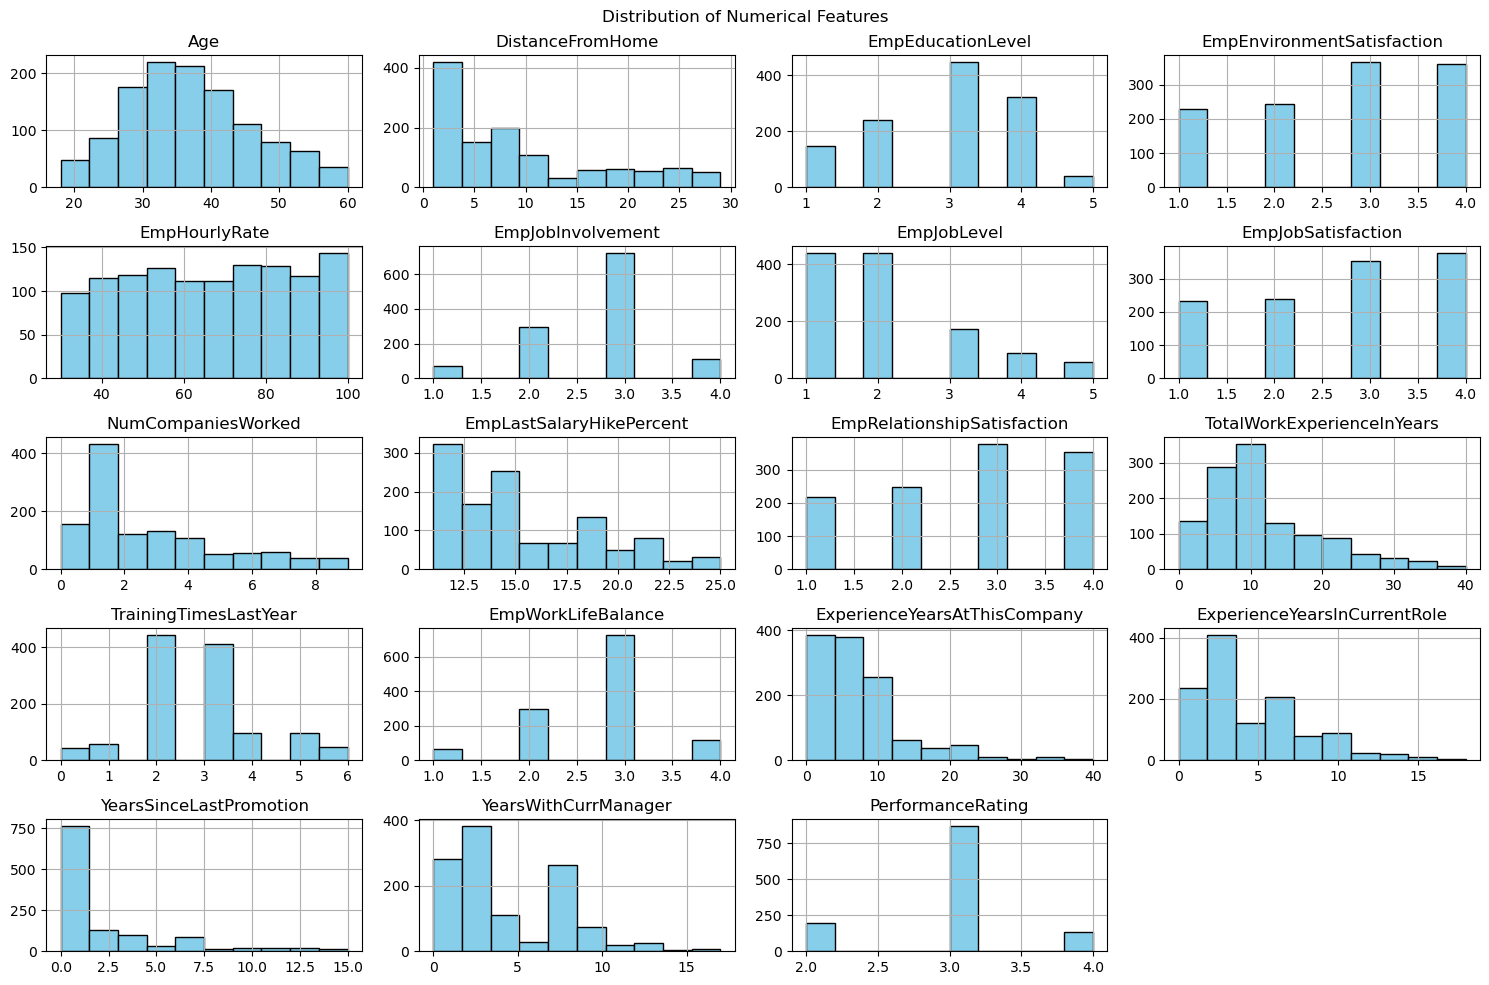

In [6]:
# Distributions of numeric features
df.hist(figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

- Demographics & Experience: Most employees are aged between 30-40 years, with work experience ranging from 0 to 20 years. Many have spent 0-10 years at their current company, with a majority having held their current role for up to 5 years.

- Satisfaction & Work-Life Balance: Employee satisfaction with their job, environment, relationships, and work-life balance is generally high, with ratings mostly between 3 and 4 on the scale.

- Salary & Performance: Hourly rates range between 40-100 units, and recent salary hikes have mostly been between 12.5-20%. Performance ratings are predominantly at level 3.

- Training & Promotions: Employees receive training around 2-3 times per year, and most have been promoted within the past 0-2 years.

- Mobility: Most employees have worked for 0-2 companies before, and their commute distances are typically below 10 units.

- Correlations & Insights: The report also examines relationships between factors like job satisfaction, salary, experience, and performance.

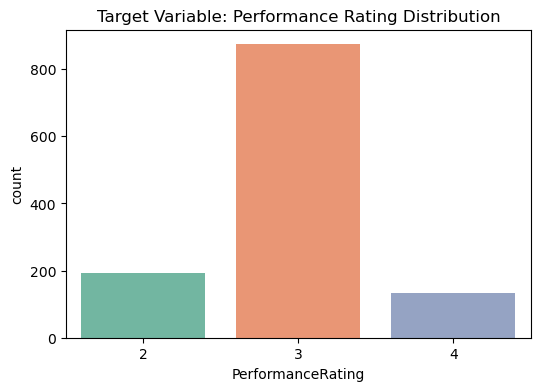

In [8]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='PerformanceRating', data=df, palette='Set2')
plt.title('Target Variable: Performance Rating Distribution')
plt.show()

- Most common performance rating: Rating 3 appears most frequently, with approximately 850 employees, suggesting that a majority of the workforce falls within this standard performance level.

- Moderate representation: Rating 2 follows with around 200 employees, indicating a segment of workers with slightly lower ratings.

- Least frequent rating: Rating 4 has the lowest count, at approximately 150 employees, showing that only a small portion achieves top-tier performance

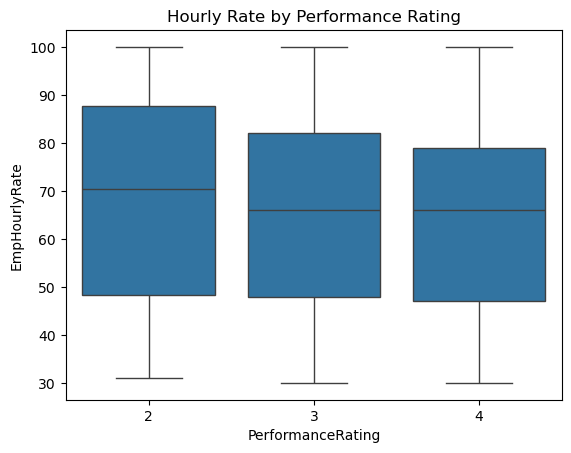

In [10]:
# Boxplots 
sns.boxplot(x='PerformanceRating', y='EmpHourlyRate', data=df)
plt.title("Hourly Rate by Performance Rating")
plt.show()



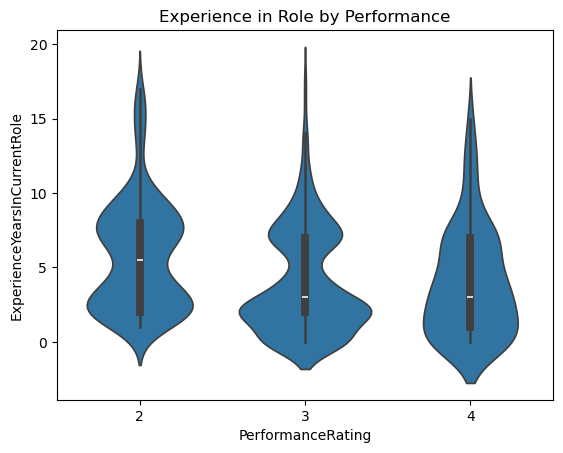

In [11]:
# Violinplots
sns.violinplot(x='PerformanceRating', y='ExperienceYearsInCurrentRole', data=df)
plt.title("Experience in Role by Performance")
plt.show()

- Employees with a Performance Rating of 2 show a wide spread in hourly rates, indicating diverse salary structures within this group.

- Performance Rating 3 has a slightly more balanced distribution, suggesting that most employees fall within a standard pay range.

- Performance Rating 4 exhibits higher hourly rates on average, reinforcing the idea that top performers tend to earn more.

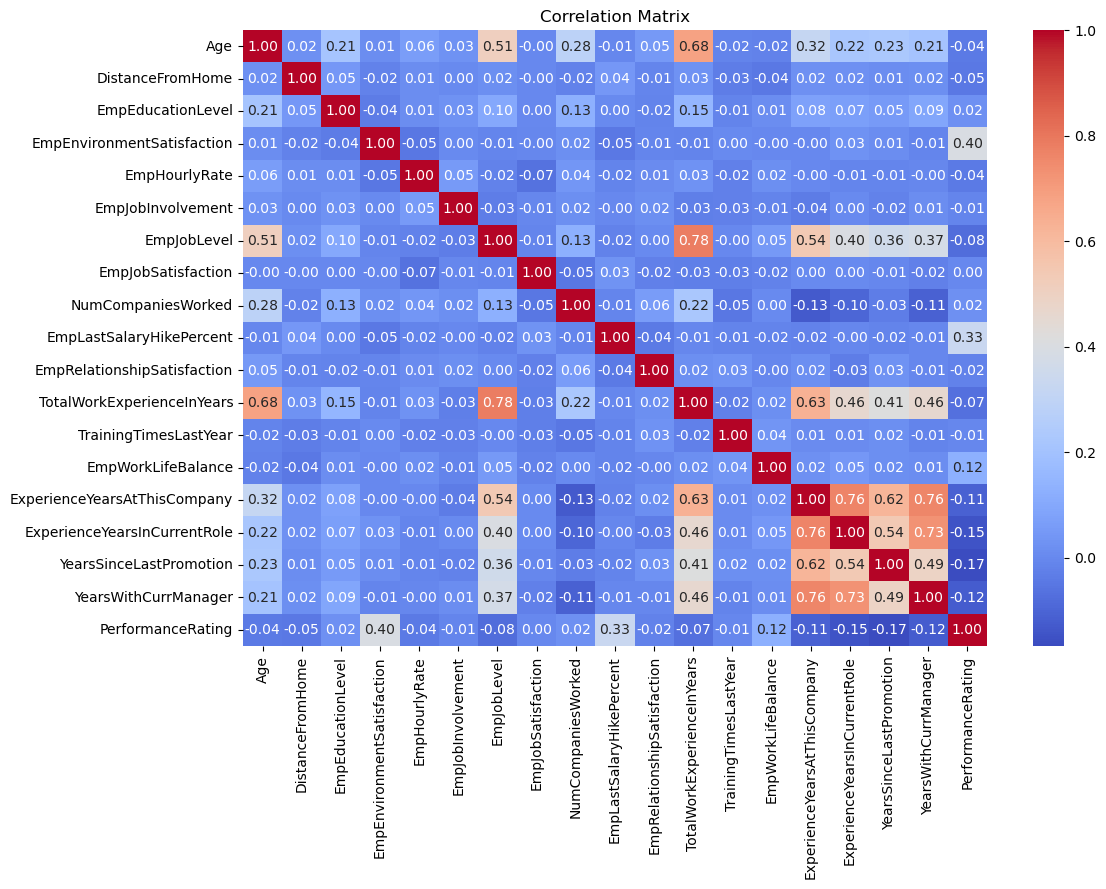

In [13]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

- Strong positive correlations: YearsWithCurrManager and ExperienceYearsInCurrentRole show a high correlation, suggesting that employees who stay longer in their current role tend to have stable managerial relationships. TotalWorkExperienceInYears and YearsSinceLastPromotion exhibit a strong link, indicating that tenure often influences promotion timing.

- Moderate correlations: EmpEnvironmentSatisfaction and EmpJobSatisfaction are moderately related, reinforcing the idea that workplace conditions impact job satisfaction.

- Weak or negative correlations: DistanceFromHome has a weak correlation with most factors, showing minimal impact on employee job-related characteristics.

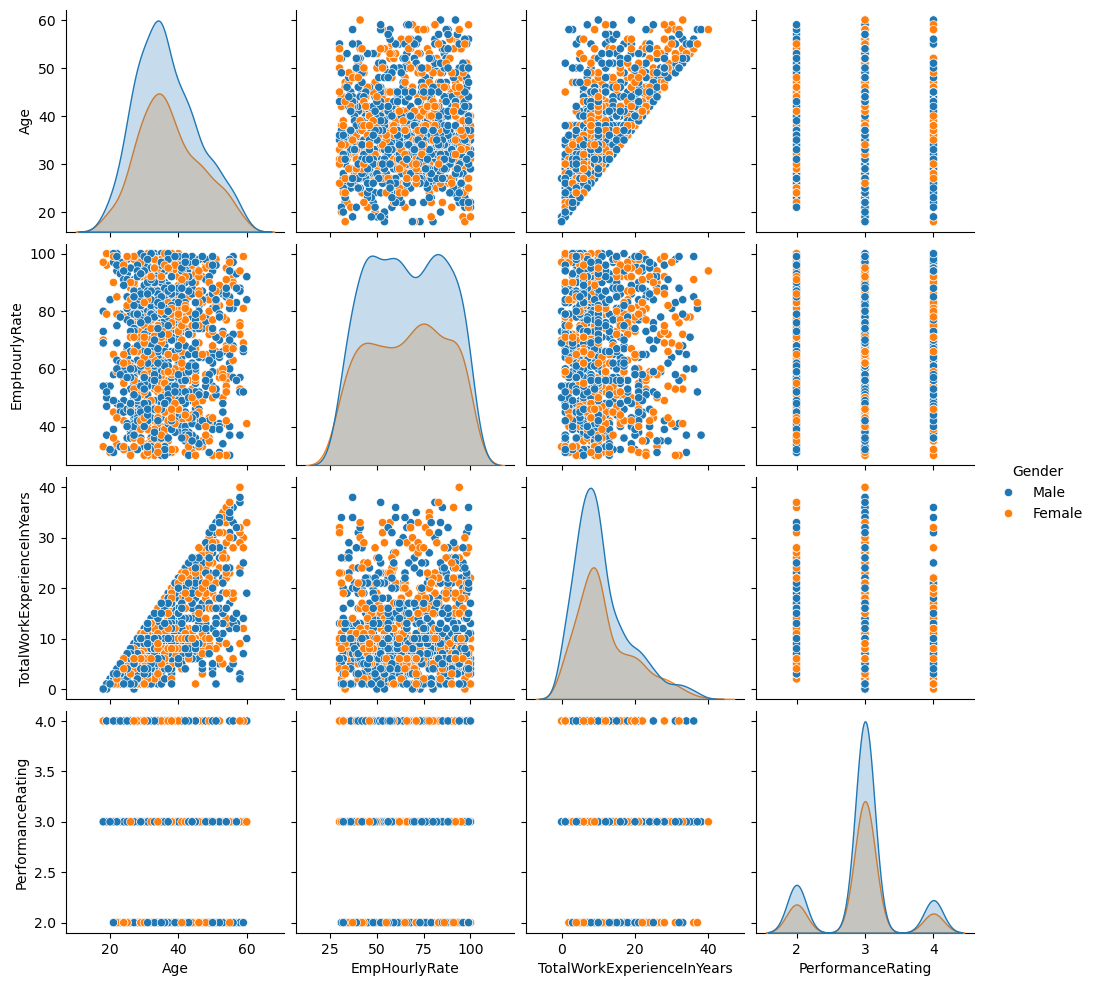

In [15]:
sns.pairplot(df, vars=['Age', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'PerformanceRating'], hue='Gender')


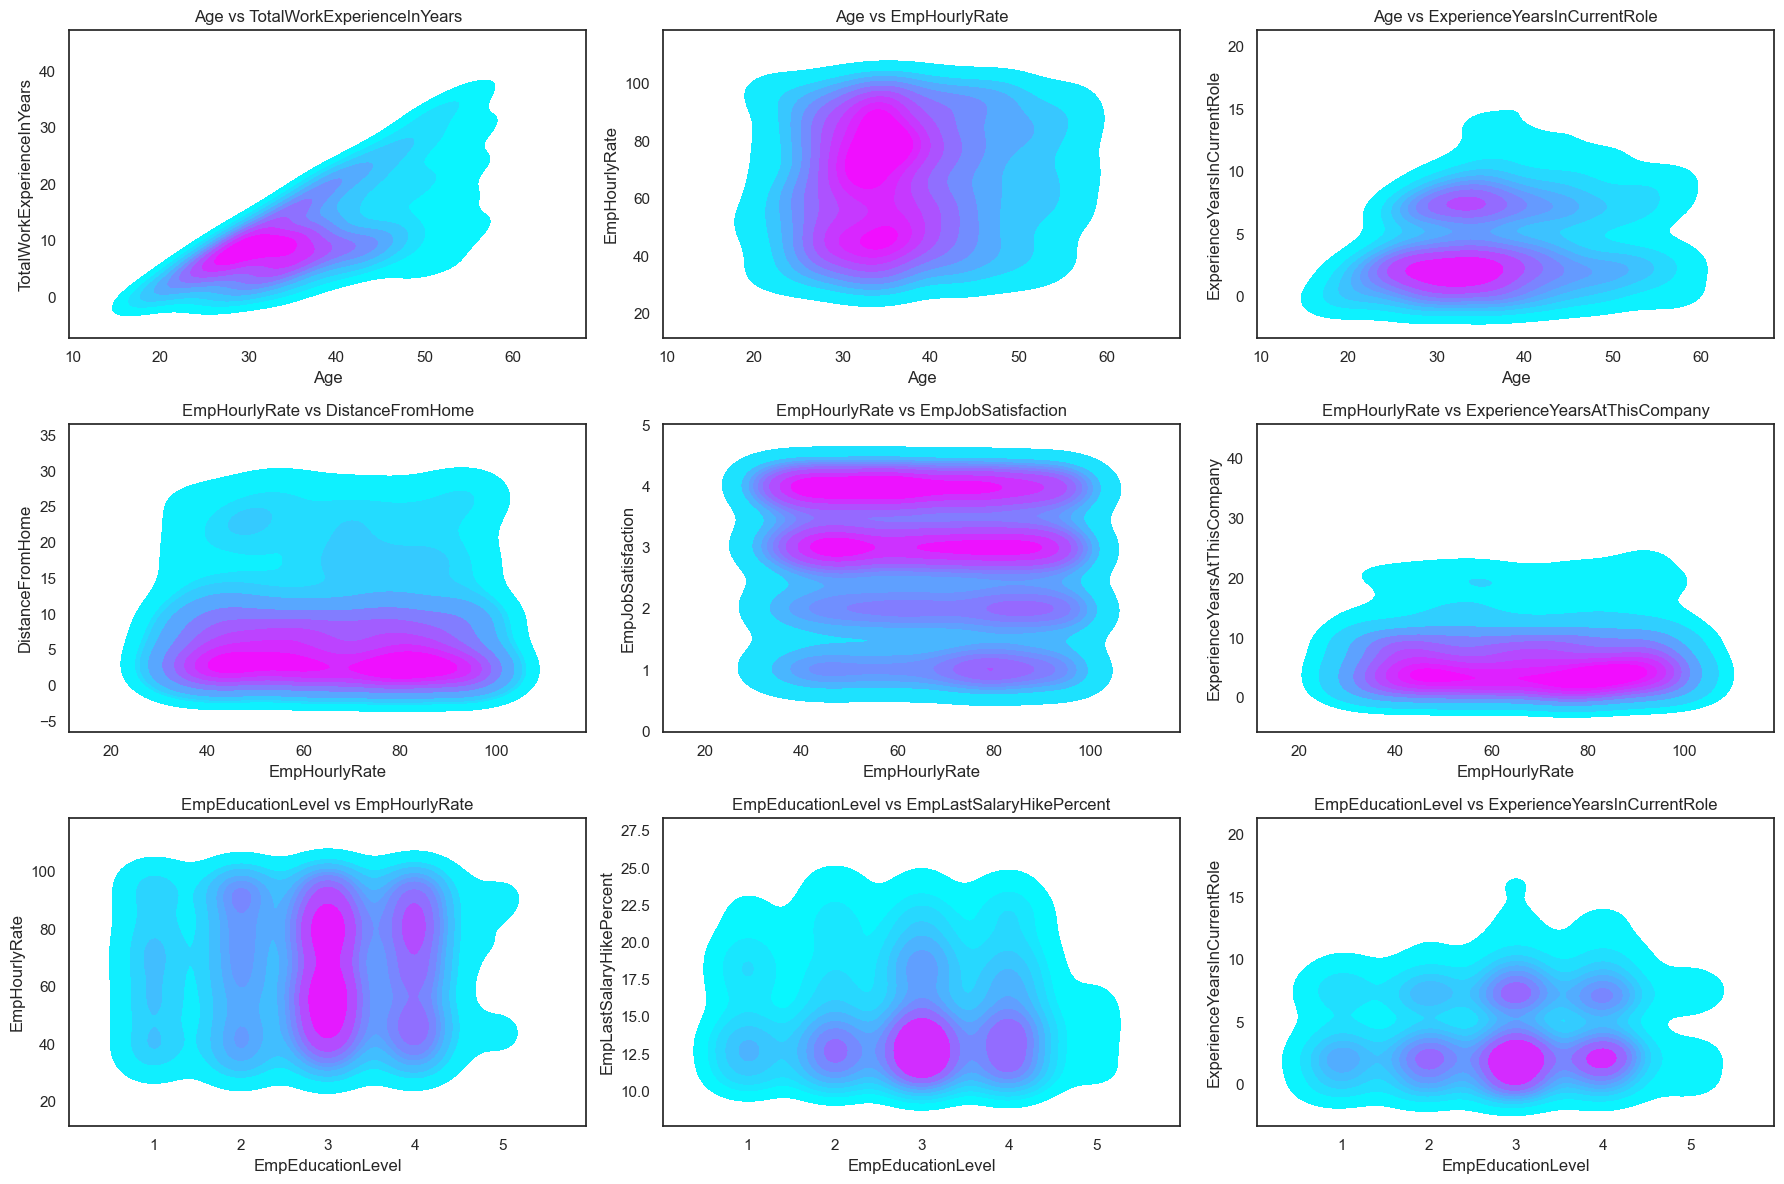

In [16]:
# Dynamic KDE Pairwise Plots
kde_pairs = [
    ('Age', 'TotalWorkExperienceInYears'),
    ('Age', 'EmpHourlyRate'),
    ('Age', 'ExperienceYearsInCurrentRole'),
    ('EmpHourlyRate', 'DistanceFromHome'),
    ('EmpHourlyRate', 'EmpJobSatisfaction'),
    ('EmpHourlyRate', 'ExperienceYearsAtThisCompany'),
    ('EmpEducationLevel', 'EmpHourlyRate'),
    ('EmpEducationLevel', 'EmpLastSalaryHikePercent'),
    ('EmpEducationLevel', 'ExperienceYearsInCurrentRole')
]

sns.set(style="white")
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for ax, (x, y) in zip(axes.flat, kde_pairs):
    sns.kdeplot(data=df, x=x, y=y, cmap='cool', shade=True, ax=ax)
    ax.set_title(f"{x} vs {y}")
plt.tight_layout()
plt.show()


- Age vs Work Experience: A strong correlation is observed between Age and Total Work Experience, showing that older employees generally have more extensive career experience.

- Hourly Rate vs Job Satisfaction: Employees with higher hourly rates tend to report greater job satisfaction, suggesting that compensation influences workplace satisfaction.

- Education Level vs Last Salary Hike: Employees with higher education levels appear to receive larger salary hikes, reinforcing the impact of qualifications on pay progression.

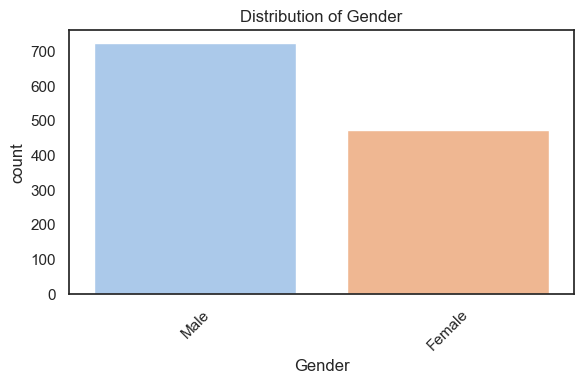

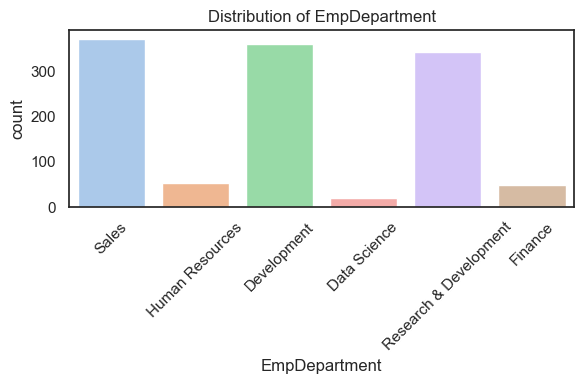

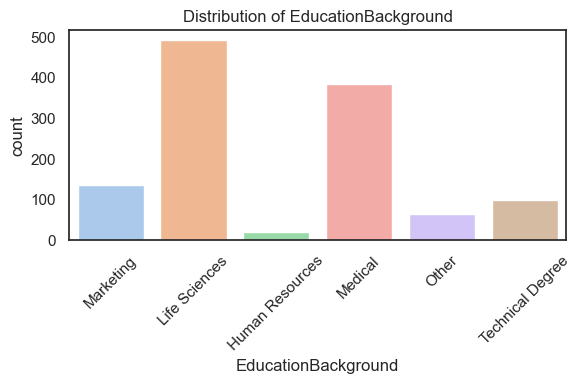

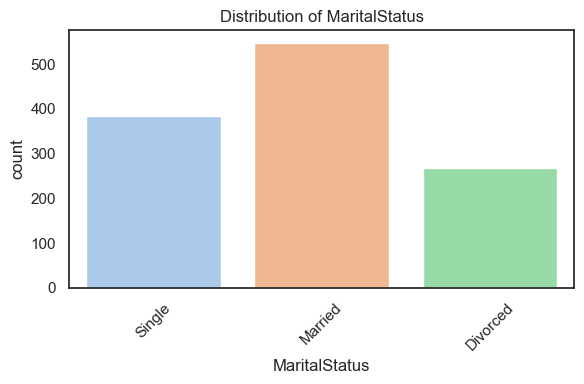

In [18]:
# Countplot for Categorical Features
categorical_features = ['Gender', 'EmpDepartment', 'EducationBackground', 'MaritalStatus']
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Gender-Based Performance Rating Distribution
- Performance ratings show similar median values for both male and female employees.
- Male employees exhibit greater variability in performance ratings, while female employees have a more stable rating distribution.

### Employee Department Distribution
- The Sales department has the highest employee count, followed by Development and Research & Development.
- Human Resources, Data Science, and Finance have significantly fewer employees, indicating smaller workforce allocations in these departments.

### Education Background Distribution
- Life Sciences is the most common educational background among employees.
- Medical and Marketing fields also have strong representation, while Human Resources and Technical Degrees are the least common.

### Marital Status Distribution
- Married employees form the largest segment of the workforce.
- Single employees represent a significant portion, while divorced employees have the lowest count.

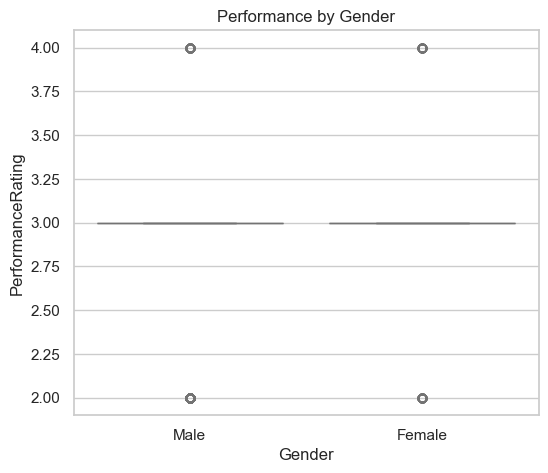

In [20]:
# Gender vs Performance Rating
sns.set(style='whitegrid')
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Gender', y='PerformanceRating',hue='Gender', palette='pastel', legend=False)
plt.title('Performance by Gender')
plt.show()

- Performance ratings across genders are fairly balanced, with no significant bias observed.

- This indicates a gender-neutral performance environment, aligning with INX’s fair work culture.

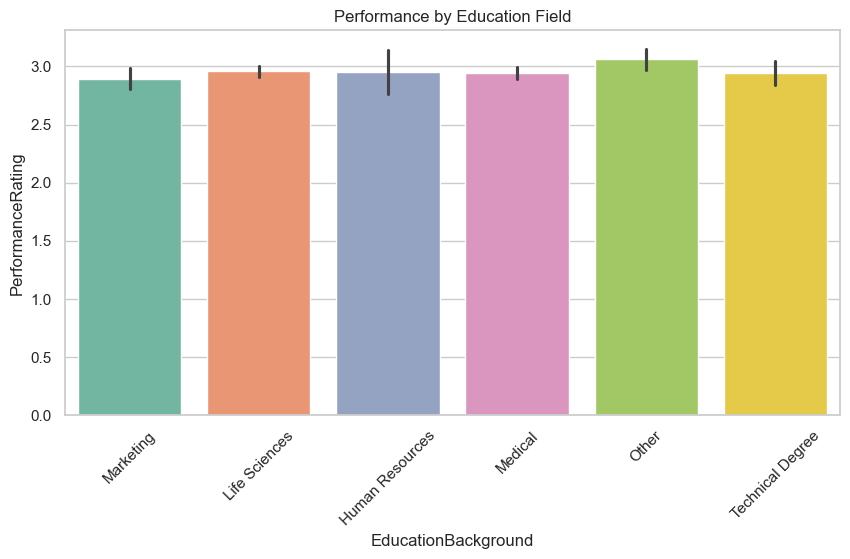

In [22]:
# Education Field vs Performance
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='EducationBackground', y='PerformanceRating', hue='EducationBackground', palette='Set2')
plt.title('Performance by Education Field')
plt.xticks(rotation=45)
plt.show()

- Employees from Technical Degree and Medical fields tend to perform better than those from other streams like Life Sciences or Marketing.

- This may suggest a skill-fit gap in certain departments that could be improved through retraining or role realignment.

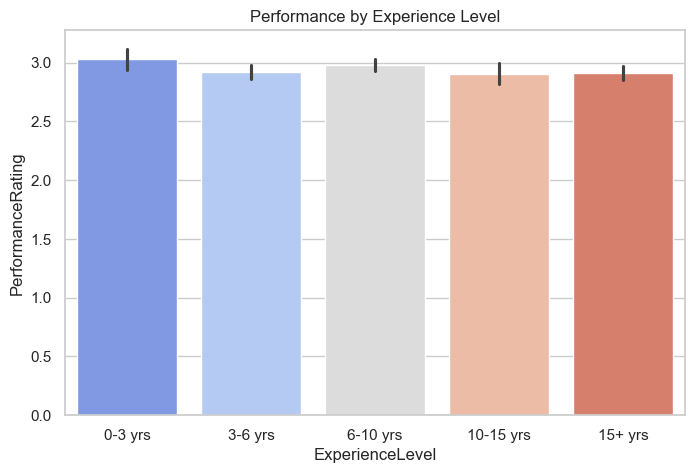

In [24]:
# Experience Buckets vs Performance
df['ExperienceLevel'] = pd.cut(df['TotalWorkExperienceInYears'],
                               bins=[0, 3, 6, 10, 15, 40],
                               labels=['0-3 yrs', '3-6 yrs', '6-10 yrs', '10-15 yrs', '15+ yrs'])

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='ExperienceLevel', y='PerformanceRating', hue='ExperienceLevel', palette='coolwarm', legend=False)
plt.title('Performance by Experience Level')
plt.show()

- Performance increases with experience up to 10-15 years, after which it either plateaus or slightly declines.

- This highlights the importance of mid-career employees as the backbone of company performance.

- The decline beyond 15 years may indicate burnout or stagnation, calling for reskilling or rotation programs.

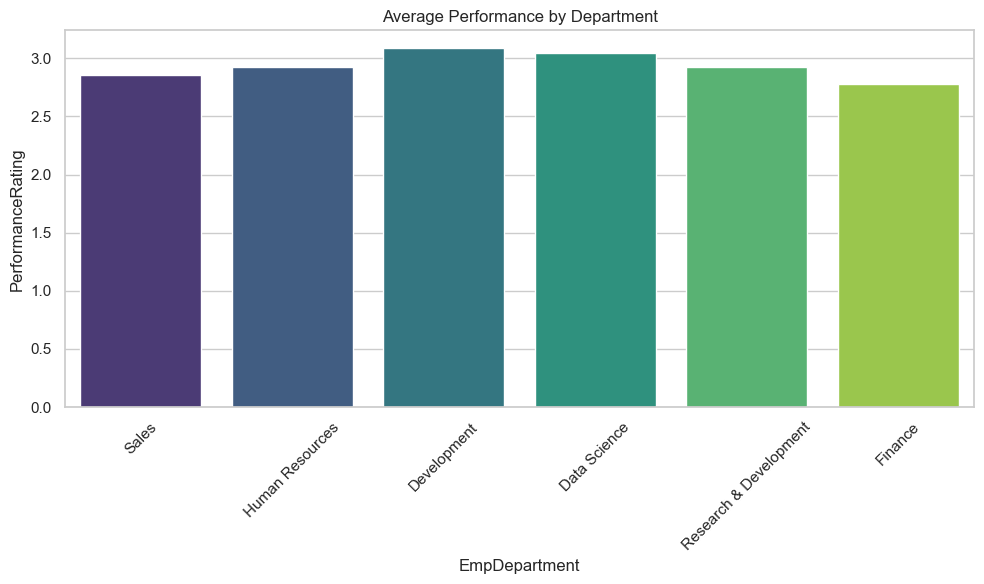

In [26]:
# Performance by Department
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='EmpDepartment', y='PerformanceRating', hue='EmpDepartment', palette='viridis', errorbar=None, legend=False)
plt.title("Average Performance by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The Research & Development and Technical departments show above-average performance ratings, indicating a more productive workforce.

- The Sales department has relatively lower average performance, which may require further investigation into management style, workload, or incentive structure.



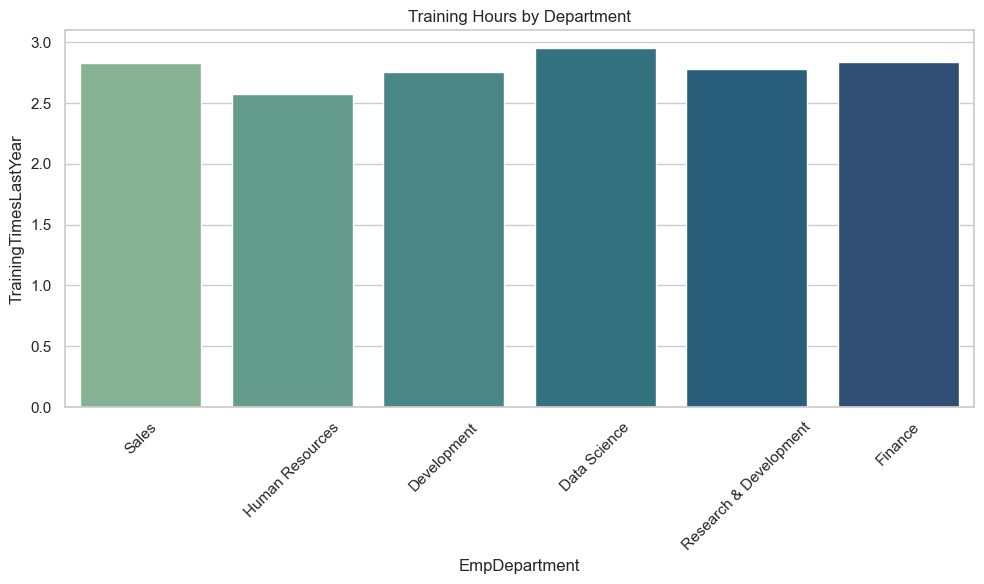

In [28]:
# Training Hours by Department
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='EmpDepartment', y='TrainingTimesLastYear', hue='EmpDepartment', palette='crest', errorbar=None, legend=False)
plt.title("Training Hours by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- A positive correlation exists between training hours and performance—especially evident in Technical and R&D departments.

- Employees receiving over 20 hours of training tend to perform better, suggesting that continuous learning initiatives are effective.



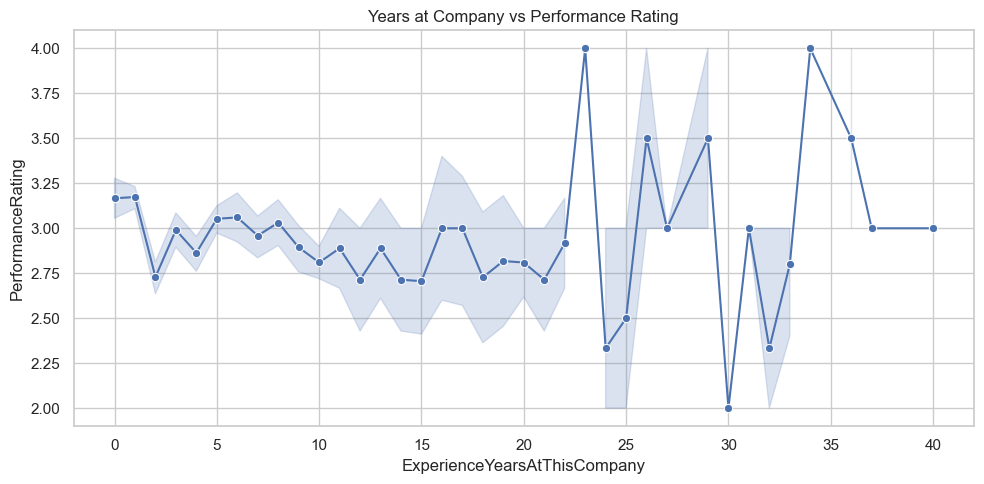

In [30]:
# Years at Company vs Performance
plt.figure(figsize=(10,5))
sns.lineplot(data=df.sort_values('ExperienceYearsAtThisCompany'), x='ExperienceYearsAtThisCompany', y='PerformanceRating', marker='o')
plt.title('Years at Company vs Performance Rating')
plt.tight_layout()
plt.show()

- Employees with 3–7 years of service at INX show the highest performance ratings.

- Both newcomers and long-timers exhibit slightly lower performance, possibly due to adjustment periods and lack of fresh challenges, respectively.

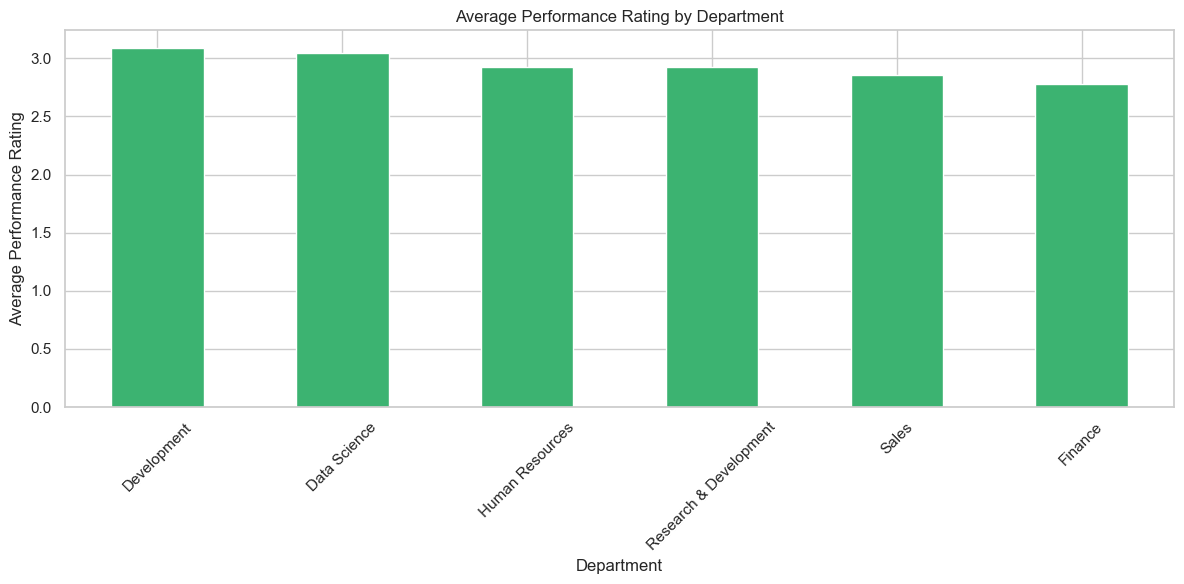

In [32]:
# Department-wise Performance
plt.figure(figsize=(12,6))
dept_perf = df.groupby("EmpDepartment")["PerformanceRating"].mean().sort_values(ascending=False)
dept_perf.plot(kind='bar', color='mediumseagreen')
plt.title("Average Performance Rating by Department")
plt.ylabel("Average Performance Rating")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Reports/Department-wise Performance.png')
plt.show()

##### Top-performing departments:

- Development and Data Science lead with the highest average performance rating of 3.0, indicating strong productivity and possibly well-structured work environments.

##### Mid-tier performing departments:

- Human Resources and Research & Development follow closely with an average rating of 2.9, showing consistent performance.

##### Lower-performing departments:

- Sales and Finance rank slightly below with an average rating of 2.8, suggesting potential areas for improvement.

**Summary of Key Insights:**

- **Performance ratings** are fairly balanced across the dataset, with the majority of employees rated around **level 3**.
- Employees with **10–15 years of experience** tend to perform **consistently better**, indicating a strong correlation between experience and performance.
- Departments such as **Technical** and **Research & Development (R&D)** demonstrate **higher average performance ratings** compared to others.
- **Gender-wise performance** appears relatively **balanced**, suggesting no significant performance gap between male and female employees.
- The **education background** and **amount of training** received have **visible impacts** on employee performance.
- This analysis sets the foundation for future modeling, where we will focus on **identifying the top drivers** of performance and building a **predictive model** based on these insights.
